In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pickle

In [2]:
NA = -200
SELECTED_COLS = ["co_gt", "c6h6_gt", "nox_gt", "no2_gt", "temp"]
COLORS = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
NUMERICAL_COLS = ["co_gt", "s1_co", "nhmc_gt", "c6h6_gt", "s2_nhmc", "nox_gt", "s3_nox", "no2_gt", "s4_no2", "s5_o3", "temp", "rh", "ah"]

In [3]:
df = pd.read_csv("AirQualityUCI.csv", na_values=[NA])
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
df.isna().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [5]:
df = df.rename(columns={
    "Date": "date", 
    "Time": "time",
    "CO(GT)": "co_gt",
    "PT08.S1(CO)": "s1_co",
    "NMHC(GT)": "nhmc_gt",
    "C6H6(GT)": "c6h6_gt",
    "PT08.S2(NMHC)": "s2_nhmc",
    "NOx(GT)": "nox_gt",
    "PT08.S3(NOx)": "s3_nox",
    "NO2(GT)": "no2_gt",
    "PT08.S4(NO2)": "s4_no2",
    "PT08.S5(O3)": "s5_o3",
    "T": "temp",
    "RH": "rh",
    "AH": "ah"})

# Remove empty columns
df = df.drop(df.columns[[-1, -2]], axis=1)

df.head(10)

,date,time,co_gt,s1_co,nhmc_gt,c6h6_gt,s2_nhmc,nox_gt,s3_nox,no2_gt,s4_no2,s5_o3,temp,rh,ah
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [6]:
# Remove rows where all features are empty
df = df.dropna(axis = 0, how = 'all')

In [7]:
df.isna().sum()

date          0
time          0
co_gt      1683
s1_co       366
nhmc_gt    8443
c6h6_gt     366
s2_nhmc     366
nox_gt     1639
s3_nox      366
no2_gt     1642
s4_no2      366
s5_o3       366
temp        366
rh          366
ah          366
dtype: int64

We see that a large number of values are missing from nhmc ground truth

In [8]:
def plot_histogram(feature, color):
    sns.histplot(data=df, x=feature, bins=30, color=color)
    plt.show()

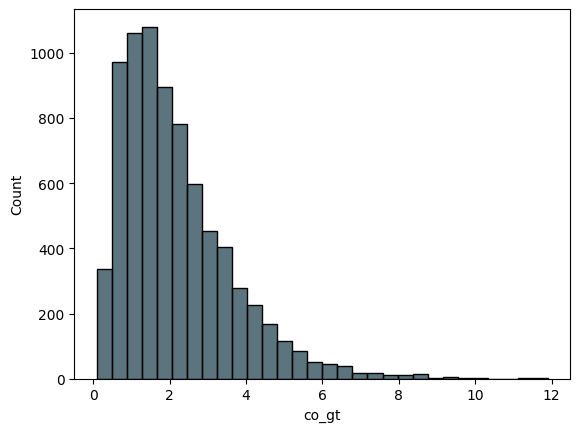

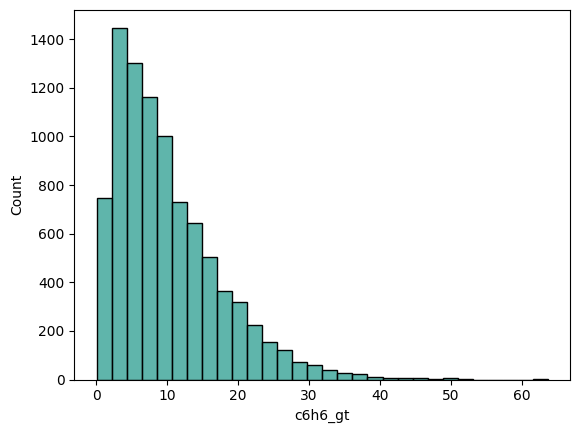

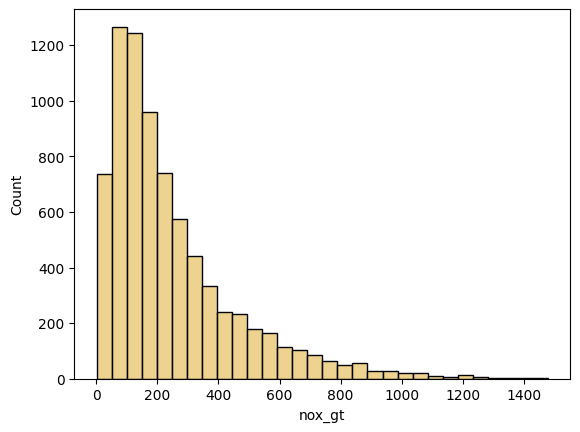

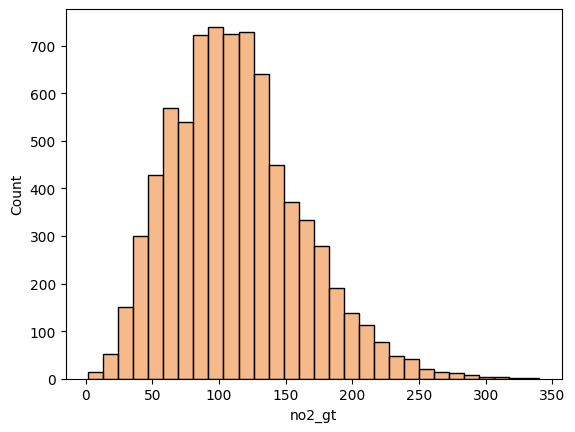

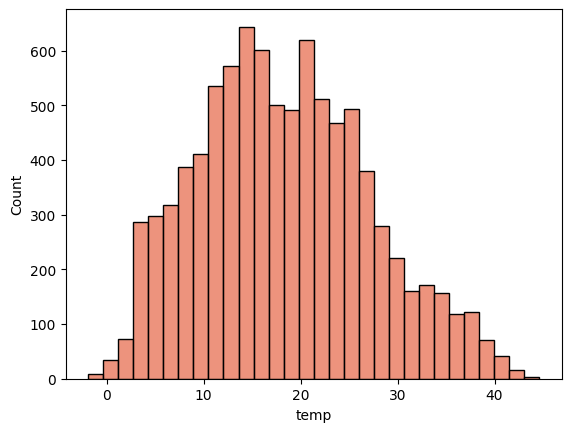

In [9]:
# Plot histograms to explore data distributions for each of the `SELECTED_COLS`
for feature, color in zip(SELECTED_COLS, COLORS):
    plot_histogram(feature, color)

Ground truth concentration values for CO, benzene, NOx show moderate positive skew, whereas NO2 and temp values show slight positive skew.

In [10]:
df[SELECTED_COLS].describe()

,co_gt,c6h6_gt,nox_gt,no2_gt,temp
count,7674.000000,8991.000000,7718.000000,7715.000000,8991.000000
mean,2.152750,10.083105,246.896735,113.091251,18.317829
std,1.453252,7.449820,212.979168,48.370108,8.832116
min,0.100000,0.100000,2.000000,2.000000,-1.900000
25%,1.100000,4.400000,98.000000,78.000000,11.800000
50%,1.800000,8.200000,180.000000,109.000000,17.800000
75%,2.900000,14.000000,326.000000,142.000000,24.400000
max,11.900000,63.700000,1479.000000,340.000000,44.600000


In [11]:
# Average `SELECTED_COLS `by week
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df_weekly = df.groupby(pd.Grouper(freq='W', key='date'))[SELECTED_COLS].mean().reset_index()
df_weekly['WeekNum'] = range(1, len(df_weekly) + 1)

def plot_time_series(feature, color):
    plt.figure(figsize=(8, 5))
    sns.set_style("white")
    sns.lineplot(x='WeekNum', y=feature, color=color, data=df_weekly, marker='o')
    plt.xlabel('Week')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

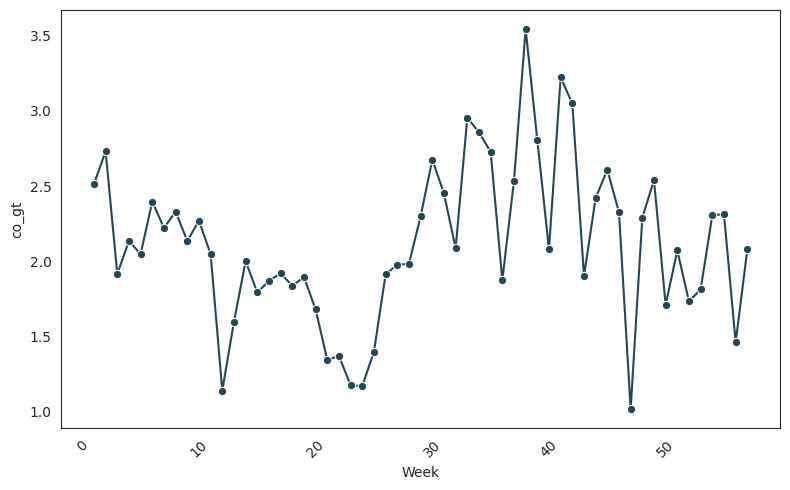

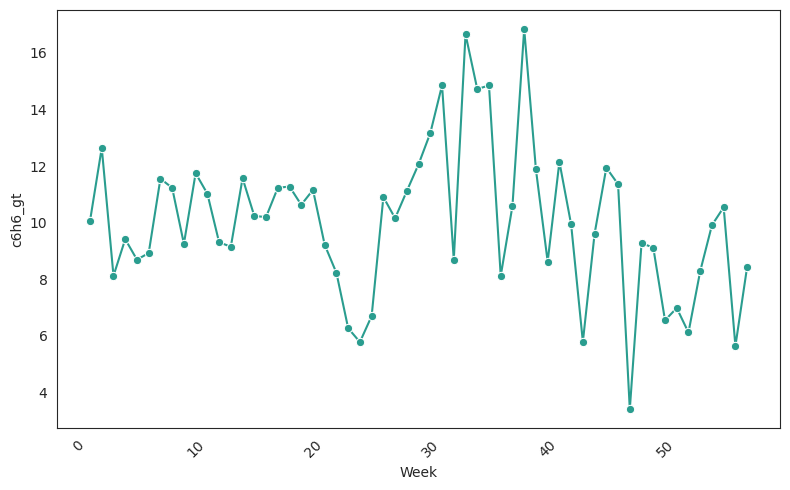

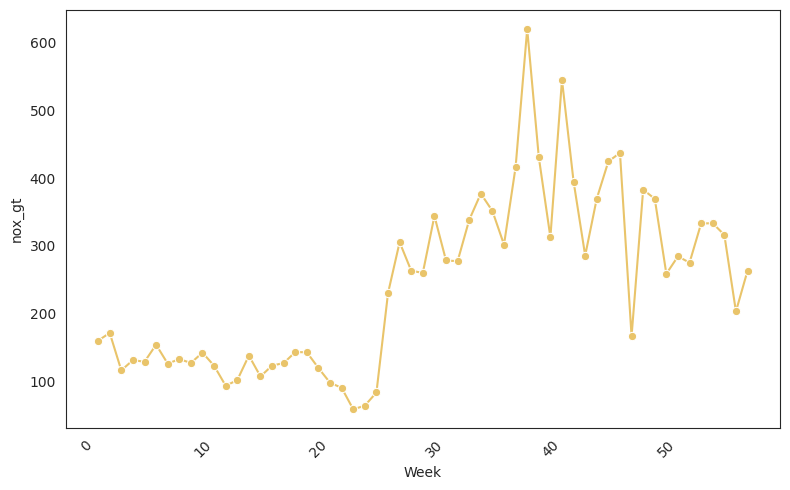

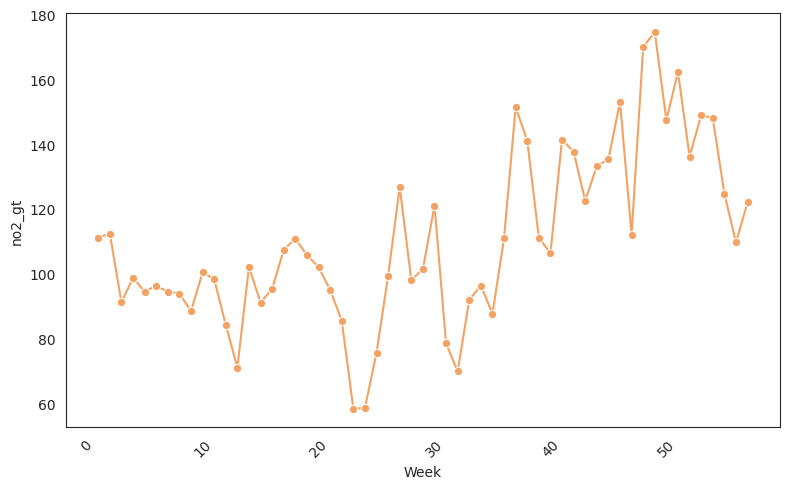

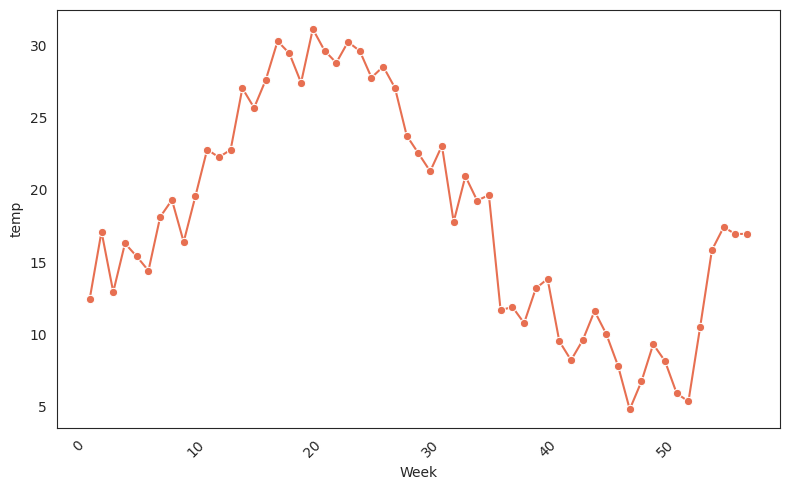

In [12]:
# Plot all `SELECTED_COLS` against time
for feature, col in zip(SELECTED_COLS, COLORS):
    plot_time_series(feature, col)

We can see that the pollutants (CO, benzene, NOx, NO2) spike roughly after week 25 and gradually dissipate, whereas the temperature 
begins to drop around week 25 and begins to increase near the end of the timeframe, showing cyclical seasonal changes in temperature 
and similar trends between pollutants. Results in pollutant concentrations past week 30 may be attributed to sensor aging effects
(drifts), according to De Vito et al. (2008)

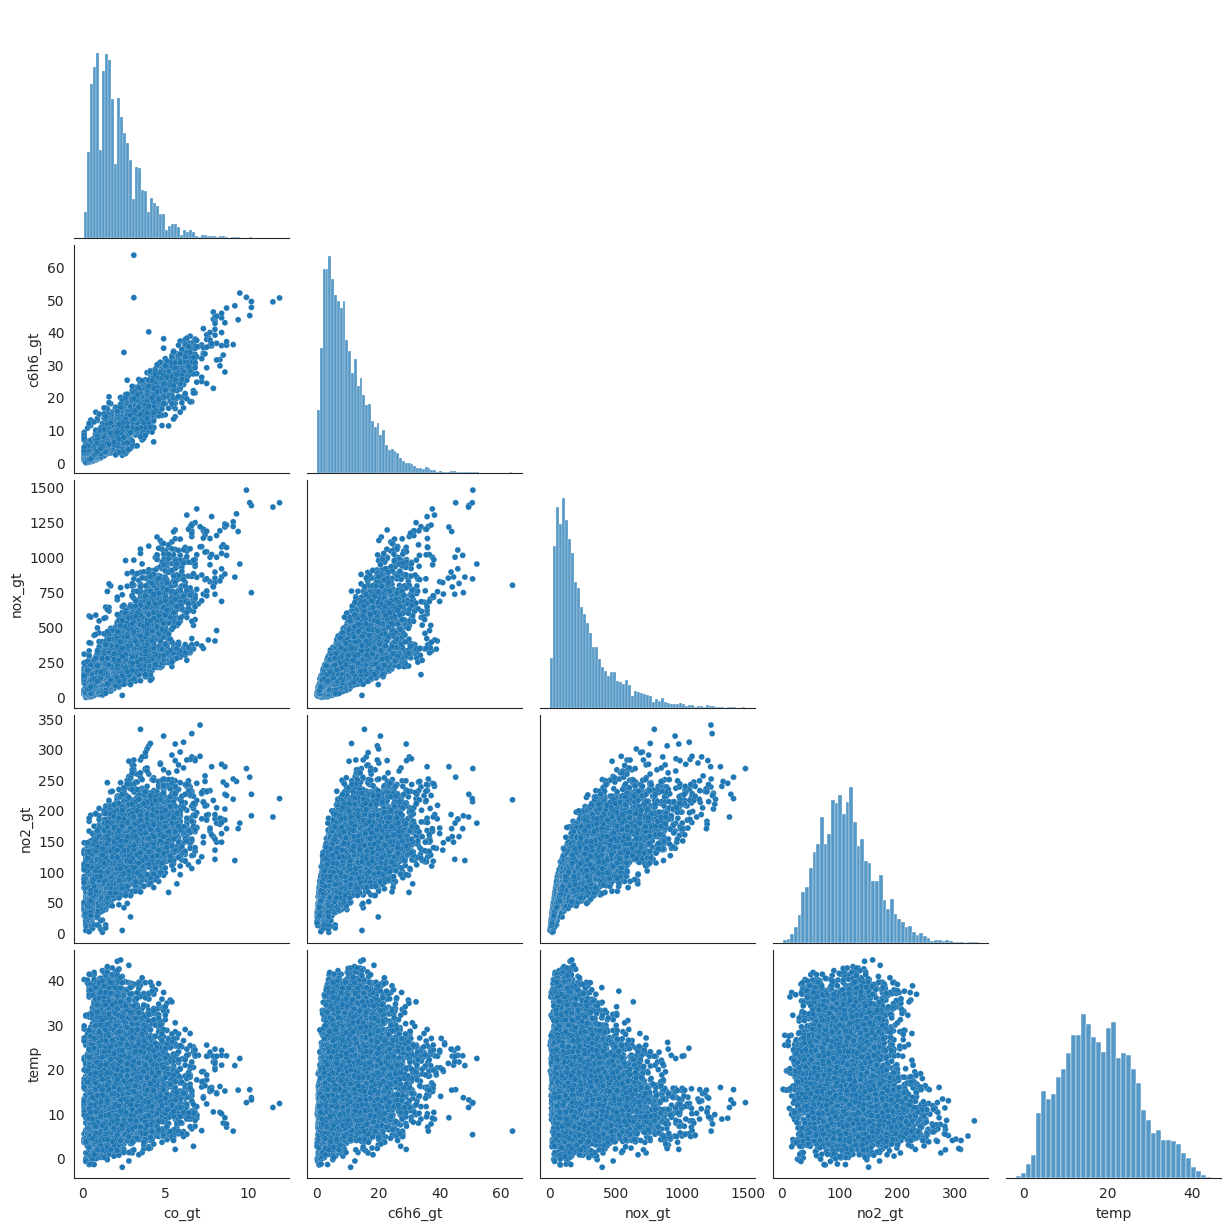

In [13]:
# Explore correlations between SELECTED COLS
sns.pairplot(df[SELECTED_COLS], 
    corner=True,
    plot_kws=dict(linewidth=0.1, size=5))

We can see that there do appear to be significant positive correlations between the pollutant concentrations (CO, benzene, NOx, NO2).

In [14]:
# Explore linear correlations
corr = df[SELECTED_COLS].corr(method='pearson')
corr

,co_gt,c6h6_gt,nox_gt,no2_gt,temp
co_gt,1.000000,0.931078,0.795028,0.683343,0.022109
c6h6_gt,0.931078,1.000000,0.718839,0.614474,0.198956
nox_gt,0.795028,0.718839,1.000000,0.763111,-0.269683
no2_gt,0.683343,0.614474,0.763111,1.000000,-0.186533
temp,0.022109,0.198956,-0.269683,-0.186533,1.000000


The pollutants are all positively correlated. CO and benzene concentrations are epecially highly positively correlated, as well as CO and NOx.

<Axes: >

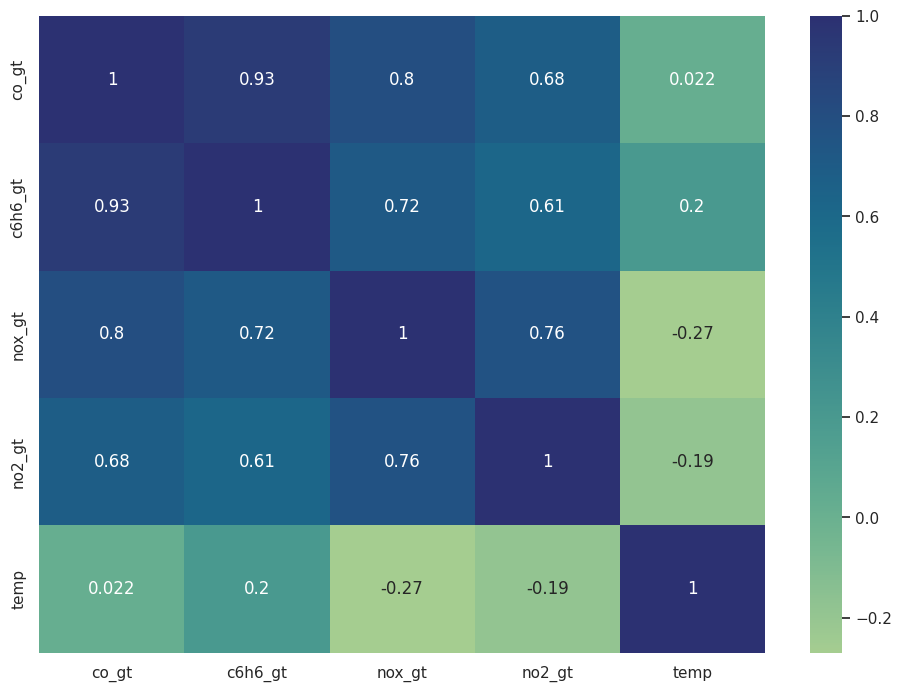

In [15]:
sns.set_theme(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr, cmap="crest", annot=True) 

In [16]:
# Investigate the dates with missing data 
dates_with_missing_data = set()
for col in ['s1_co', 'c6h6_gt', 's2_nhmc', 's3_nox', 's4_no2', 's5_o3', 'temp', 'rh', 'ah']:
    missing_dates = df[df[col].isnull()]['date']
    dates_with_missing_data.update(missing_dates)

print("Dates with missing data:", sorted(list(dates_with_missing_data)))
print("dates num: ", len(dates_with_missing_data))

Dates with missing data: [Timestamp('2004-04-01 00:00:00'), Timestamp('2004-04-08 00:00:00'), Timestamp('2004-04-09 00:00:00'), Timestamp('2004-05-25 00:00:00'), Timestamp('2004-05-26 00:00:00'), Timestamp('2004-06-19 00:00:00'), Timestamp('2004-06-20 00:00:00'), Timestamp('2004-06-21 00:00:00'), Timestamp('2004-07-31 00:00:00'), Timestamp('2004-08-09 00:00:00'), Timestamp('2004-08-26 00:00:00'), Timestamp('2004-08-27 00:00:00'), Timestamp('2004-08-28 00:00:00'), Timestamp('2004-09-07 00:00:00'), Timestamp('2004-09-08 00:00:00'), Timestamp('2004-10-01 00:00:00'), Timestamp('2004-12-14 00:00:00'), Timestamp('2004-12-15 00:00:00'), Timestamp('2004-12-16 00:00:00'), Timestamp('2004-12-17 00:00:00'), Timestamp('2004-12-24 00:00:00'), Timestamp('2005-01-02 00:00:00'), Timestamp('2005-01-03 00:00:00'), Timestamp('2005-01-04 00:00:00'), Timestamp('2005-01-05 00:00:00'), Timestamp('2005-01-28 00:00:00'), Timestamp('2005-01-29 00:00:00'), Timestamp('2005-02-08 00:00:00'), Timestamp('2005-02-09 

In [17]:
missing_vals = df[SELECTED_COLS + ['nhmc_gt']].isna().sum() / len(df)
missing_vals.sort_values(inplace=True)
missing_vals = missing_vals.to_frame()
missing_vals.columns = ['Missing %']
missing_vals.index.names = ['Features']

<Axes: xlabel='Features', ylabel='Missing %'>

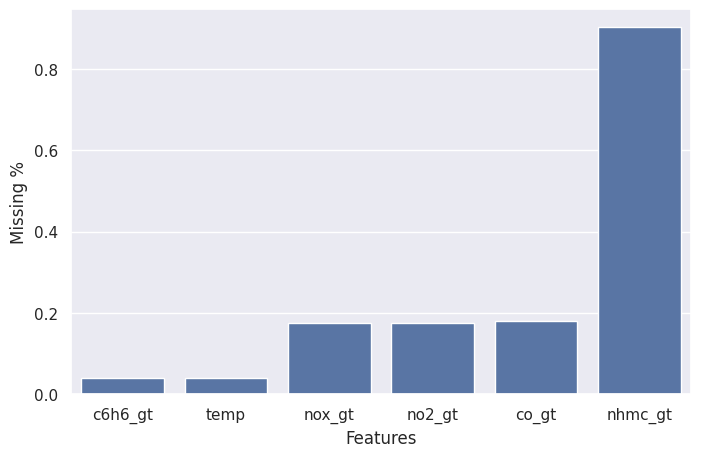

In [18]:
# Visualise missing data
sns.set_theme(rc={'figure.figsize':(8, 5)})
sns.barplot(x='Features', y='Missing %', data=missing_vals)

NHMC possesses a lot (90%) of missing data! Mean or mode imputation are unreasonable for this feature due to the huge proportion of missing values. Perhaps this feature could be imputed using regression imputation...

In [19]:
# Produces a dictionary of attributes as keys and lists of other attributes with abs(pearson correlation) > 0.85 as values
def get_high_corrs(corr):
    high_corrs = {}
    for col in NUMERICAL_COLS:
        high_corr_columns = corr[(np.abs(corr[col]) > 0.85)].sort_values(by=col, axis=0, ascending=False).index.tolist()
        high_corr_columns.remove(col)
        high_corrs[col] = [high_corr_columns[0]] if high_corr_columns else []
    return high_corrs

In [20]:
corr = df[NUMERICAL_COLS].corr(method='pearson')
high_corrs = get_high_corrs(corr)
high_corrs

{'co_gt': ['c6h6_gt'],
 's1_co': ['s5_o3'],
 'nhmc_gt': ['c6h6_gt'],
 'c6h6_gt': ['s2_nhmc'],
 's2_nhmc': ['c6h6_gt'],
 'nox_gt': [],
 's3_nox': [],
 'no2_gt': [],
 's4_no2': ['nhmc_gt'],
 's5_o3': ['s1_co'],
 'temp': [],
 'rh': [],
 'ah': []}

In [21]:
# Columns to fill with regression imputation. These columns were chosen to fill using regression since they had the most missing data and possessed 
# strong correlations with other features. Other columns with missing data will be filled using a different method.
MISSING_COLS = ['co_gt', 'nhmc_gt']

# Performs regression imputation (imputes missing values based on linear regression with other variables that have high correlation)
def regression_imputation(high_corrs, data, columns, plot_resids_vs_fits=False):
    for feature in columns:
        
        parameters = high_corrs[feature]

        select_cols = parameters + [feature]
        df_train = data[select_cols].dropna()

        # train a Linear Regression model to impute missing data
        model = linear_model.LinearRegression()
        
        # Investigate residuals vs. fits plot to see if the linear model can be appropriately assumed
        if plot_resids_vs_fits:
            X_train, X_test, y_train, y_test = train_test_split(df_train[parameters], df_train[feature], test_size=0.25, random_state=42)
            model.fit(X = X_train, y = y_train)

            y_pred = model.predict(X_test)
            resids = y_test - y_pred 
            sns.set_theme(rc={'figure.figsize':(10, 8)}, style='white')
            sns.scatterplot(x = y_pred, y = resids, data = None, color = 'red')
            plt.show()
        
        # Impute the missing values using the trained model
        else:
            model.fit(X = df_train[parameters], y = df_train[feature])
            missing_indices = data[feature].isnull() & data[parameters].notnull().all(axis=1)
            predicted_vals = model.predict(data.loc[missing_indices, parameters])
            data.loc[missing_indices, feature] = predicted_vals
            
    return data if not plot_resids_vs_fits else None

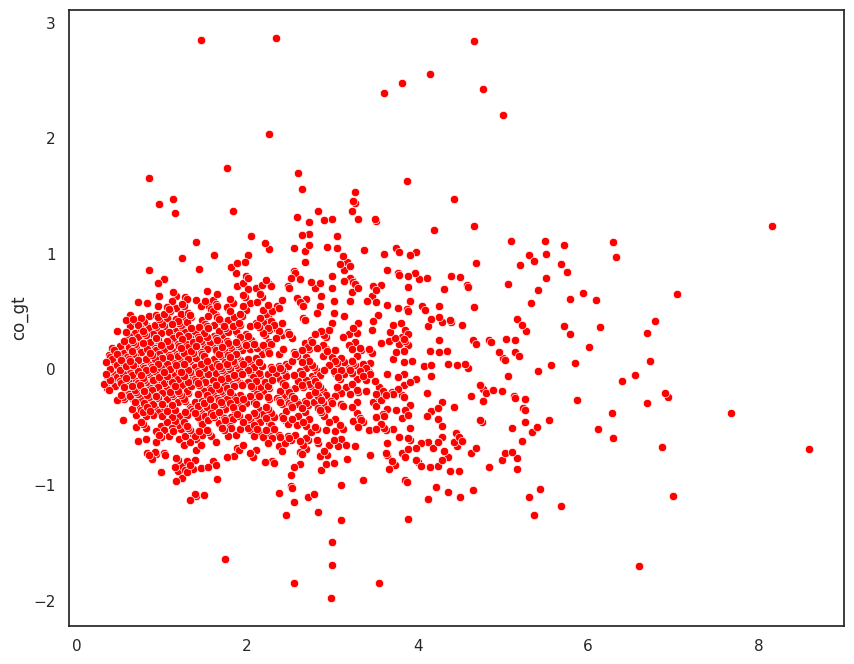

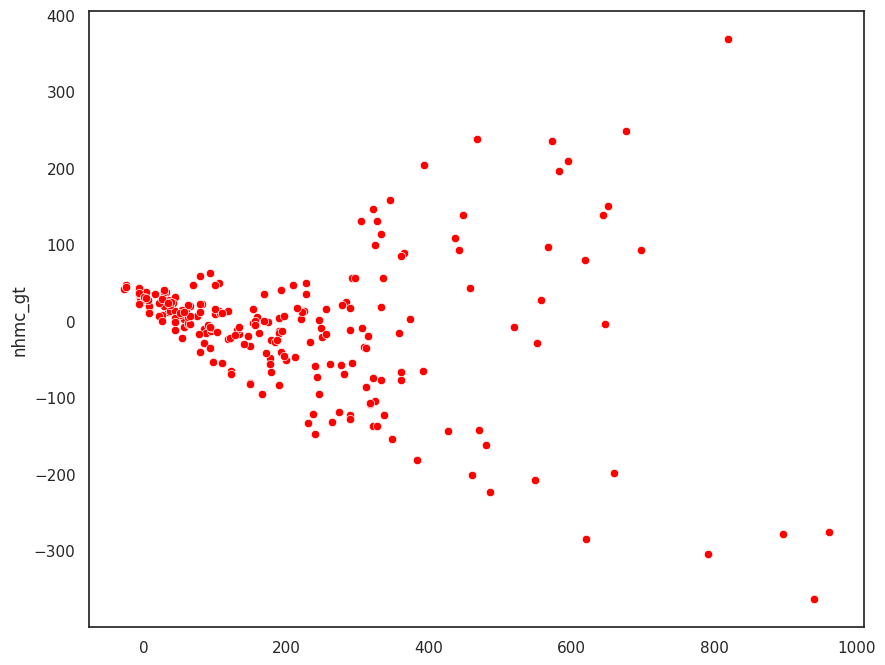

In [22]:
# Check resids vs. fits 
regression_imputation(high_corrs, df.copy(), MISSING_COLS, True)

The imputation of CO ground truth values using linear regression appears acceptable. 

On the other hand, the imputation of NHMC ground truth values shows severe heteroscedasticity, which violates a key assumption of linear relationships. Therefore, we can explore other methods of imputation to try and address this issue, i.e., weighted least squares regression.  

In [23]:
impute_df = regression_imputation(high_corrs, df.copy(), ['co_gt'])
impute_df.isna().sum()

date          0
time          0
co_gt        36
s1_co       366
nhmc_gt    8443
c6h6_gt     366
s2_nhmc     366
nox_gt     1639
s3_nox      366
no2_gt     1642
s4_no2      366
s5_o3       366
temp        366
rh          366
ah          366
dtype: int64

In [24]:
# Performs weighted least squares regression imputation
def wls_regression_imputation(high_corrs, data, plot_resids_vs_fits=False):
    for feature in MISSING_COLS:
        
        parameters = high_corrs[feature]

        select_cols = parameters + [feature]
        df_train = data[select_cols].dropna()
        
        if plot_resids_vs_fits:
            X_train, X_test, y_train, y_test = train_test_split(df_train[parameters], df_train[feature], test_size=0.25, random_state=42)
            
            # Train a wls model to impute missing data
            errors = y_train - np.mean(y_train)
            error_variance = np.var(errors)
            weights = 1 / error_variance

            # Fit weighted least squares regression model
            X_train = sm.add_constant(X_train)
            model = sm.WLS(y_train, X_train, weights=weights)
            results = model.fit()

            # Print regression results
            print(results.summary())
            
            y_pred = (X_test.values * results.params[1]) + results.params[0]
            resids = y_test - y_pred.flatten()
            print(resids)

            sns.scatterplot(x = y_pred.flatten(), y = resids, data = None, color = 'red')
            plt.show()
        
        else:
            model.fit(X = df_train[parameters], y = df_train[feature])
            missing_indices = data[feature].isnull() & data[parameters].notnull().all(axis=1)
            predicted_vals = model.predict(data.loc[missing_indices, parameters])
            data.loc[missing_indices, feature] = predicted_vals
            
    return data if not plot_resids_vs_fits else None

                            WLS Regression Results                            
Dep. Variable:                  co_gt   R-squared:                       0.863
Model:                            WLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.478e+04
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        05:53:41   Log-Likelihood:                -4368.5
No. Observations:                5508   AIC:                             8741.
Df Residuals:                    5506   BIC:                             8754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2882      0.012     23.477      0.0

/tmp/ipykernel_8049/782820384.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = (X_test.values * results.params[1]) + results.params[0]


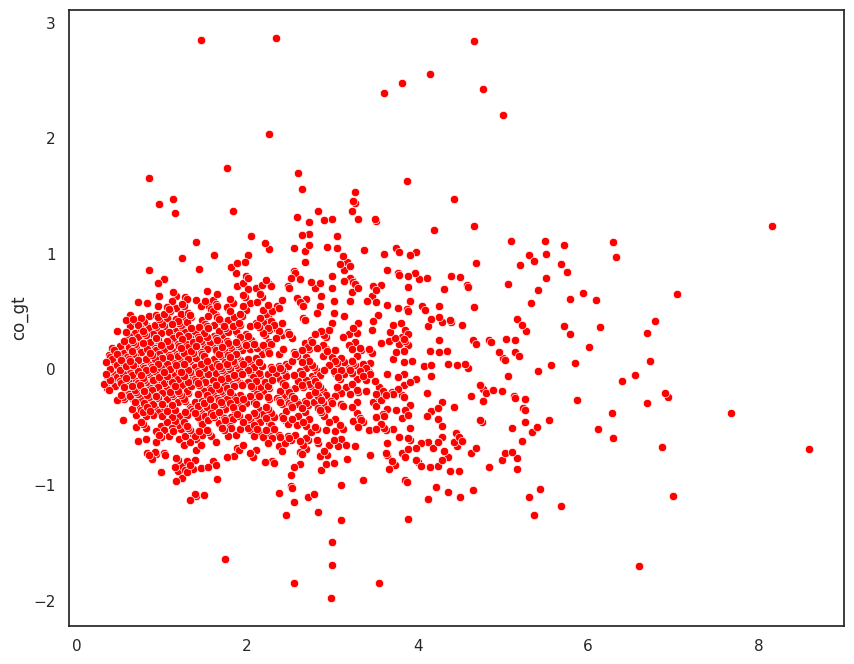

                            WLS Regression Results                            
Dep. Variable:                nhmc_gt   R-squared:                       0.820
Model:                            WLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     3012.
Date:                Sat, 18 May 2024   Prob (F-statistic):          9.72e-249
Time:                        05:53:41   Log-Likelihood:                -3923.3
No. Observations:                 665   AIC:                             7851.
Df Residuals:                     663   BIC:                             7860.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0622      5.882     -6.981      0.0

/tmp/ipykernel_8049/782820384.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = (X_test.values * results.params[1]) + results.params[0]


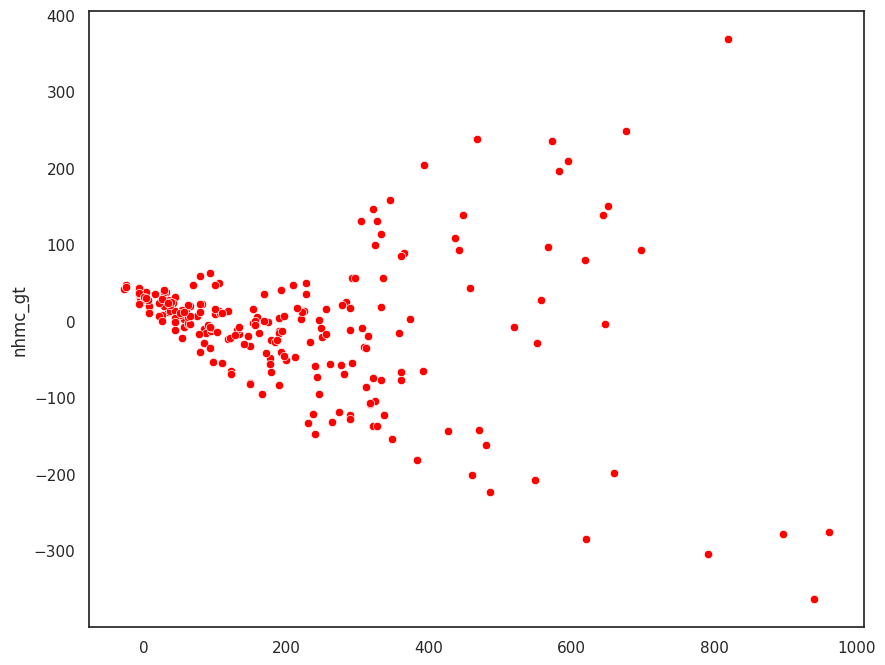

In [25]:
# Check resids vs. fits
wls_regression_imputation(high_corrs, df.copy(), True)

Unfortunately, the residuals vs. fits plot for weighted least squares regression still shows extreme heteroscedasticity in the case of NHMC ground truth. Thus, it is best to drop this column moving forward, since it contains such a massive proportion of missing data and cannot be reliably imputed using the methods explored. Further work should be done to explore other methods for NHMC ground truth data imputation, including other machine learning-based methods.

In [26]:
# CO ground truth values are imputed using regression, since it satisfies the linear relationship assumptions. Drop NHMC ground truth.
df = impute_df
del df['nhmc_gt']
len(df)

9357

In [27]:
df.isna().sum()

date          0
time          0
co_gt        36
s1_co       366
c6h6_gt     366
s2_nhmc     366
nox_gt     1639
s3_nox      366
no2_gt     1642
s4_no2      366
s5_o3       366
temp        366
rh          366
ah          366
dtype: int64

In [28]:
# Impute remaining columns using forward fill (the previous hour's data will be used to fill missing values)
def impute_ffill(df):
    # Combine date and time columns to form a timestamp and sort by this column
    df['date'] = df['date'].dt.strftime('%d/%m/%Y')
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M:%S')
    df.sort_values(by='datetime', inplace=True)

    # Forward-fill
    df = df.ffill()

    df = df.drop(columns='datetime')

    return df

In [29]:
df_imputed = impute_ffill(df.copy())

In [30]:
df = df_imputed

In [31]:
# Remove statistical outliers
FINAL_COLS = [col for col in NUMERICAL_COLS if col != 'nhmc_gt']
df[FINAL_COLS] = df[FINAL_COLS][(np.abs(stats.zscore(df[FINAL_COLS])) < 3).all(axis=1)]
df = df.dropna()
len(df)

8925

In [32]:
df.isna().sum()

date       0
time       0
co_gt      0
s1_co      0
c6h6_gt    0
s2_nhmc    0
nox_gt     0
s3_nox     0
no2_gt     0
s4_no2     0
s5_o3      0
temp       0
rh         0
ah         0
dtype: int64

In [33]:
scaler = MinMaxScaler()
FEATURES_TO_SCALE = [f for f in FINAL_COLS if f != 'rh']
df[FEATURES_TO_SCALE] = scaler.fit_transform(df[FEATURES_TO_SCALE])
df.head()

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

/tmp/ipykernel_8049/1602889053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[FEATURES_TO_SCALE] = scaler.fit_transform(df[FEATURES_TO_SCALE])


In [34]:
df['rh'] = df['rh']/100

/tmp/ipykernel_8049/808976693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rh'] = df['rh']/100


In [35]:
df.to_csv('processed_data.csv', index=False)